# Product Review Analysis

In [2]:
# initial preprocessing ....first we have to do initial preprocessing bcoz we have data here with diff diff language

## Importing Libraries

In [3]:
 pip install googletrans==3.1.0a0

In [4]:
import pandas as pd 
from langdetect import detect 
#pip install langdetect
## It supports around 55 languages
##it will give predictions in codes
from googletrans import Translator 
# pip install googletrans==3.1.0a0
import seaborn as sns
import matplotlib.pyplot as plt



- langdetect library : langdetect is a Python library used for language detection. It can automatically detect the language of a given text or document..it supports arround 55 languages..it has code for every language.

- googletrans:
  googletrans is a Python library that provides a simple interface to Google Translate API for performing language translation. It       allows you to translate text from one language to another using Google Translate.

## Loading dataset

In [5]:
data = pd.read_csv(r"C:\Users\prach\Downloads\Product_Review_data.csv")
data.head(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


# Dataset Understanding

- review_id:    Unique identifier for each review.

- product_id:   Unique identifier for the product being reviewed.

- reviewer_id:  Unique identifier for the reviewer.

- stars:        The rating given by the reviewer (usually ranging from 1 to 5).

- review_body:  The text of the review itself, where the reviewer shares their feedback or experience.

- review_title: The title or summary of the review.

- language:      The language of the review (e.g., "es" for Spanish).

- product_category: The category to which the product belongs (e.g., "electronics", "drugstore", "wireless", "shoes").

# EDA

Before go with text analysis we can do common analysis on product categories, stars to see product performance and customer preferances and satisfaction.

### Point 1: Product Performance

In [6]:
product_performance = data.groupby('product_category')['stars'].mean()
print("Product Performance (Average Star Ratings):")
print(product_performance)

Product Performance (Average Star Ratings):
product_category
apparel                     2.866829
automotive                  2.950721
baby_product                3.089326
beauty                      2.935805
book                        3.399316
camera                      3.109277
digital_ebook_purchase      3.357027
drugstore                   3.010521
electronics                 2.887626
furniture                   3.048958
grocery                     3.147510
home                        2.980380
home_improvement            3.036584
industrial_supplies         3.078947
jewelry                     2.930538
kitchen                     3.016281
lawn_and_garden             2.773189
luggage                     3.293570
musical_instruments         3.225490
office_product              3.086565
other                       3.079756
pc                          3.062550
personal_care_appliances    3.022950
pet_products                2.991112
shoes                       3.109296
sports        

### Point 2: Customer Satisfaction

In [7]:

customer_satisfaction = data.groupby('product_category')['stars'].value_counts(normalize=True).unstack()
print("Customer Satisfaction (Normalized Count of Star Ratings):")
print(customer_satisfaction)

Customer Satisfaction (Normalized Count of Star Ratings):
stars                            1         2         3         4         5
product_category                                                          
apparel                   0.221893  0.210040  0.209169  0.197141  0.161757
automotive                0.212096  0.194456  0.207896  0.201736  0.183816
baby_product              0.170047  0.197705  0.216349  0.204671  0.211227
beauty                    0.210713  0.208123  0.209759  0.177457  0.193948
book                      0.125190  0.170213  0.189590  0.210106  0.304901
camera                    0.176956  0.186200  0.199406  0.225487  0.211951
digital_ebook_purchase    0.098752  0.172545  0.240369  0.249593  0.238741
drugstore                 0.202612  0.197352  0.199710  0.187557  0.212770
electronics               0.231295  0.210688  0.183149  0.188830  0.186038
furniture                 0.173264  0.200038  0.215911  0.226047  0.184739
grocery                   0.168582  0.1934

### Point 3: Product Categories

In [8]:

category_distribution = data['product_category'].value_counts()
print("Product Category Distribution:")
print(category_distribution)


Product Category Distribution:
home                        26962
wireless                    25886
toy                         13647
sports                      13189
pc                          11191
home_improvement            10879
electronics                 10385
beauty                       7337
automotive                   7143
kitchen                      6695
apparel                      5737
drugstore                    5513
book                         5264
furniture                    5229
baby_product                 4881
office_product               4771
lawn_and_garden              4237
other                        3937
pet_products                 3713
personal_care_appliances     3573
luggage                      3328
camera                       3029
shoes                        2754
digital_ebook_purchase       1843
video_games                  1733
jewelry                      1598
musical_instruments          1530
watch                        1490
industrial_suppli

### Text Processing

In [9]:
##here we reviews in multiple langauges 
## here we are mainly focusing on review and stars so first of all we extract that 2 columns only from dataset.
## so first we have to detect languages from rivew and then we have to translate it.

In [10]:
data = data[['review_body','stars']]

In [11]:
data

,review_body,stars
0,Nada bueno se me fue ka pantalla en menos de 8...,1
1,"Horrible, nos tuvimos que comprar otro porque ...",1
2,Te obligan a comprar dos unidades y te llega s...,1
3,"No entro en descalificar al vendedor, solo pue...",1
4,Llega tarde y co la talla equivocada,1
...,...,...
199995,Mando funciona perfectamente y cumple con toda...,5
199996,"Compré la batería con cierta reticencia, pero ...",5
199997,Buena calidad. Satisfecha con la compra.,5
199998,Perfecto para el cumple de mi hijo,5


In [12]:
data.shape

(200000, 2)

In [13]:
sample = data.sample(1000)
sample

,review_body,stars
197250,La caja del producto llegó un poco dañada. Per...,5
35989,Inservible y además te puedes cargar la cámara...,1
194365,Muy buen tamaño. Muy práctica. No pesa y tiene...,5
14189,Me ha llegado toda sucia y rayada. Se ve que m...,1
16747,Los pintauñas se caen a la mínima. No duran ni...,1
...,...,...
165566,"Cable largo, ruido el necesario y muy eficaz. ...",5
98611,El aro es demasiado pequeño al igual que el ta...,3
60238,Son muy pequeños y se rompen con facilidad Yo ...,2
147823,Todo es acostumbrarse,4


In [14]:
sample.reset_index(drop=True,inplace=True)

In [15]:
sample

,review_body,stars
0,La caja del producto llegó un poco dañada. Per...,5
1,Inservible y además te puedes cargar la cámara...,1
2,Muy buen tamaño. Muy práctica. No pesa y tiene...,5
3,Me ha llegado toda sucia y rayada. Se ve que m...,1
4,Los pintauñas se caen a la mínima. No duran ni...,1
...,...,...
995,"Cable largo, ruido el necesario y muy eficaz. ...",5
996,El aro es demasiado pequeño al igual que el ta...,3
997,Son muy pequeños y se rompen con facilidad Yo ...,2
998,Todo es acostumbrarse,4


In [16]:
# lang detection 
def lang_detect(data):
    lang = detect(data)
    return lang

In [17]:
## lang detector and google translator takes lots of time.so for that we take only random sample of 1000

In [18]:
sample['language'] = sample.review_body.apply(lang_detect)
sample

,review_body,stars,language
0,La caja del producto llegó un poco dañada. Per...,5,es
1,Inservible y además te puedes cargar la cámara...,1,es
2,Muy buen tamaño. Muy práctica. No pesa y tiene...,5,es
3,Me ha llegado toda sucia y rayada. Se ve que m...,1,es
4,Los pintauñas se caen a la mínima. No duran ni...,1,es
...,...,...,...
995,"Cable largo, ruido el necesario y muy eficaz. ...",5,es
996,El aro es demasiado pequeño al igual que el ta...,3,es
997,Son muy pequeños y se rompen con facilidad Yo ...,2,es
998,Todo es acostumbrarse,4,es


In [19]:
sample.language.value_counts()

es    972
pt     16
it      4
de      2
ca      2
hr      1
pl      1
so      1
en      1
Name: language, dtype: int64

In [20]:
from googletrans import Translator 

In [21]:
# translator 
def lang_translator(data):
    translator = Translator()
    translated_text = translator.translate(data)
    return translated_text.text

In [22]:
sample.review_body[1]

'Inservible y además te puedes cargar la cámara. Entra agua.'

In [23]:
lang_translator(sample.review_body[1])

'Useless and you can also charge the camera. Water enters.'

In [24]:
sample['translated_review'] = sample.review_body.apply(lang_translator)

In [25]:
sample.to_csv(r"translated_review.csv")

In [26]:
sample

,review_body,stars,language,translated_review
0,La caja del producto llegó un poco dañada. Per...,5,es,The product box arrived a little damaged. But ...
1,Inservible y además te puedes cargar la cámara...,1,es,Useless and you can also charge the camera. Wa...
2,Muy buen tamaño. Muy práctica. No pesa y tiene...,5,es,Very good size. Very practical. It is not heav...
3,Me ha llegado toda sucia y rayada. Se ve que m...,1,es,It arrived to me all dirty and scratched. It s...
4,Los pintauñas se caen a la mínima. No duran ni...,1,es,The nail polishes fall off at the slightest. T...
...,...,...,...,...
995,"Cable largo, ruido el necesario y muy eficaz. ...",5,es,"Long cable, noise as necessary and very effect..."
996,El aro es demasiado pequeño al igual que el ta...,3,es,"The hoop is too small, as is the backboard, wh..."
997,Son muy pequeños y se rompen con facilidad Yo ...,2,es,They are very small and break easily. I used t...
998,Todo es acostumbrarse,4,es,It's all about getting used to


### Point 4: Product Quality and Reliability

In [27]:

product_quality = sample[sample['translated_review'].str.contains('defect|malfunction|poor quality', case=False)]
print("Product Quality and Reliability (Reviews with Quality Issues):")
print(product_quality["translated_review"])

Product Quality and Reliability (Reviews with Quality Issues):
124    I liked it for its width and stability, but it...
138    When you buy a camera of this price you expect...
232    In 7 months it has stopped working. I have use...
300    I got carried away by the positive comments. Y...
392    Installed on a grand c4 picasso. After a day o...
516    It came defective, the high beam illuminates v...
580                     very poor quality, breaks easily
597    It broke half an hour after opening it. My 2-y...
645    As a camera it leaves a lot to be desired. Hav...
938    The strap does not fit well to the watch, on t...
939    I liked the shape of the candles but they are ...
971    The product arrived in defective boxes with sc...
991    The fabric is very thin and of poor quality fo...
Name: translated_review, dtype: object


In [28]:
!pip install contractions

  Obtaining dependency information for anyascii from https://files.pythonhosted.org/packages/4f/7b/a9a747e0632271d855da379532b05a62c58e979813814a57fa3b3afeb3a4/anyascii-0.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for pyahocorasick from https://files.pythonhosted.org/packages/f6/ad/2852dba3e9027cb22adfe1563733571d58a9fb36fd8dbaedd00012369223/pyahocorasick-2.0.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
   ---------------------------------------  286.7/289.9 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 289.9/289.9 kB 4.5 MB/s eta 0:00:00


In [29]:
# ngrams 
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter ##particitem counts..its a handy library we dnt have to code
## simply we give list to the counter and it will count the unique words in alist
from string import punctuation
from nltk.corpus import stopwords
import contractions

In [30]:
def get_ngrams(data,ngram_range):
# in word2vec we have given data in nasted list format
## here we give tokens -
   # tokens = word_tokenize(data)
    ngram_list = ngrams(data,ngram_range)
    final_ngrams = []
    for i in ngram_list:
        if ngram_range==1 :
            final_ngrams.append(i[0])
        elif ngram_range==2 :
            final_ngrams.append(" ".join([i[0],i[1]]))
        elif ngram_range==3 :
            final_ngrams.append(" ".join([i[0],i[1],i[2]]))
    return final_ngrams

In [31]:
unigrams=sample.translated_review.apply(lambda x: get_ngrams(x,1))

In [32]:
unigrams

0      [T, h, e,  , p, r, o, d, u, c, t,  , b, o, x, ...
1      [U, s, e, l, e, s, s,  , a, n, d,  , y, o, u, ...
2      [V, e, r, y,  , g, o, o, d,  , s, i, z, e, ., ...
3      [I, t,  , a, r, r, i, v, e, d,  , t, o,  , m, ...
4      [T, h, e,  , n, a, i, l,  , p, o, l, i, s, h, ...
                             ...                        
995    [L, o, n, g,  , c, a, b, l, e, ,,  , n, o, i, ...
996    [T, h, e,  , h, o, o, p,  , i, s,  , t, o, o, ...
997    [T, h, e, y,  , a, r, e,  , v, e, r, y,  , s, ...
998    [I, t, ', s,  , a, l, l,  , a, b, o, u, t,  , ...
999    [T, h, e, y,  , d, o, n, ', t,  , b, r, i, n, ...
Name: translated_review, Length: 1000, dtype: object

In [33]:
bigrams=sample.translated_review.apply(lambda x: get_ngrams(x,2))

In [34]:
bigrams

0      [T h, h e, e  ,   p, p r, r o, o d, d u, u c, ...
1      [U s, s e, e l, l e, e s, s s, s  ,   a, a n, ...
2      [V e, e r, r y, y  ,   g, g o, o o, o d, d  , ...
3      [I t, t  ,   a, a r, r r, r i, i v, v e, e d, ...
4      [T h, h e, e  ,   n, n a, a i, i l, l  ,   p, ...
                             ...                        
995    [L o, o n, n g, g  ,   c, c a, a b, b l, l e, ...
996    [T h, h e, e  ,   h, h o, o o, o p, p  ,   i, ...
997    [T h, h e, e y, y  ,   a, a r, r e, e  ,   v, ...
998    [I t, t ', ' s, s  ,   a, a l, l l, l  ,   a, ...
999    [T h, h e, e y, y  ,   d, d o, o n, n ', ' t, ...
Name: translated_review, Length: 1000, dtype: object

In [35]:
final_unigrams=[]
for i in unigrams:
    final_unigrams.extend(i)
final_unigrams   

['T',
 'h',
 'e',
 ' ',
 'p',
 'r',
 'o',
 'd',
 'u',
 'c',
 't',
 ' ',
 'b',
 'o',
 'x',
 ' ',
 'a',
 'r',
 'r',
 'i',
 'v',
 'e',
 'd',
 ' ',
 'a',
 ' ',
 'l',
 'i',
 't',
 't',
 'l',
 'e',
 ' ',
 'd',
 'a',
 'm',
 'a',
 'g',
 'e',
 'd',
 '.',
 ' ',
 'B',
 'u',
 't',
 ' ',
 'w',
 'h',
 'a',
 't',
 ' ',
 'i',
 's',
 ' ',
 'i',
 'n',
 't',
 'e',
 'r',
 'e',
 's',
 't',
 'i',
 'n',
 'g',
 ' ',
 'i',
 's',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'p',
 'r',
 'o',
 'd',
 'u',
 'c',
 't',
 '.',
 ' ',
 'I',
 ' ',
 'h',
 'a',
 'v',
 'e',
 ' ',
 'a',
 'p',
 'p',
 'l',
 'i',
 'e',
 'd',
 ' ',
 'i',
 't',
 ' ',
 't',
 'o',
 ' ',
 'm',
 'y',
 ' ',
 'd',
 'a',
 'u',
 'g',
 'h',
 't',
 'e',
 'r',
 '.',
 ' ',
 'I',
 "'",
 'v',
 'e',
 ' ',
 'h',
 'a',
 'd',
 ' ',
 'i',
 't',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 't',
 'w',
 'o',
 ' ',
 'h',
 'o',
 'u',
 'r',
 's',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'l',
 'i',
 'q',
 'u',
 'i',
 'd',
 ' ',
 'o',
 'n',
 ' ',
 'm',
 'y',
 ' ',
 'h',
 'e',
 'a'

In [36]:
cnt=Counter(final_unigrams).most_common(20)

In [37]:
cnt

[(' ', 29215),
 ('e', 14780),
 ('t', 13539),
 ('a', 9161),
 ('o', 9131),
 ('i', 8629),
 ('s', 7314),
 ('n', 6957),
 ('r', 6657),
 ('h', 6567),
 ('l', 4827),
 ('d', 4730),
 ('c', 3453),
 ('u', 3321),
 ('m', 2784),
 ('y', 2671),
 ('p', 2421),
 ('f', 2352),
 ('g', 2221),
 ('w', 2024)]

In [38]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prach\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prach\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [39]:
def expand_text(data):
    expanded_doc = contractions.fix(data)
    return expanded_doc
stopword_list = stopwords.words("english")
stopword_list.remove("not")
stopword_list.remove("no")
stopword_list.remove("nor")
def clean_data(data):
    tokens = word_tokenize(data)
    normalization = [word.lower() for word in tokens]
    remove_punct = [word for word in normalization if word not in punctuation]
    words_without_stop = [word for word in  remove_punct if word not in stopword_list]
    clean_text = [word for word in words_without_stop if len(word)>2]
    return clean_text

In [40]:
expand_text("I'dont")

"I'do not"

In [41]:
clean_data("we have enjoyed,Really not great phone in this price range.!!. Vivo brand using first time. really great experience,")

['enjoyed',
 'really',
 'not',
 'great',
 'phone',
 'price',
 'range.',
 'vivo',
 'brand',
 'using',
 'first',
 'time',
 'really',
 'great',
 'experience']

In [42]:
clean_text = sample.translated_review.apply(expand_text)
clean_text = clean_text.apply(clean_data)

In [43]:
clean_text

0      [product, box, arrived, little, damaged, inter...
1         [useless, also, charge, camera, water, enters]
2      [good, size, practical, not, heavy, enough, ca...
3      [arrived, dirty, scratched, seems, foisted, us...
4      [nail, polishes, fall, slightest, not, last, e...
                             ...                        
995    [long, cable, noise, necessary, effective, sma...
996    [hoop, small, backboard, also, unstable, salar...
997    [small, break, easily, used, add, petals, wedd...
998                                      [getting, used]
999    [not, bring, shame, sent, email, amazon, see, ...
Name: translated_review, Length: 1000, dtype: object

In [44]:
unigrams = clean_text.apply(lambda x : get_ngrams(x,1))
final_unigrams = []
for i in unigrams:
    final_unigrams.extend(i)
cnt = Counter(final_unigrams).most_common(30)

In [45]:
final_unigrams

['product',
 'box',
 'arrived',
 'little',
 'damaged',
 'interesting',
 'product',
 'applied',
 'daughter',
 'two',
 'hours',
 'liquid',
 'head',
 'plastic',
 'wrap',
 'washing',
 'removed',
 'dead',
 'bugs',
 'not',
 'single',
 'nit',
 'left',
 'passing',
 'nit',
 'trap',
 'happy',
 'product',
 'useless',
 'also',
 'charge',
 'camera',
 'water',
 'enters',
 'good',
 'size',
 'practical',
 'not',
 'heavy',
 'enough',
 'capacity',
 'arrived',
 'dirty',
 'scratched',
 'seems',
 'foisted',
 'used',
 'returned',
 'chair',
 'shame',
 'least',
 'could',
 'cleaned',
 'hide',
 'nail',
 'polishes',
 'fall',
 'slightest',
 'not',
 'last',
 'even',
 'day',
 'supposed',
 'dry',
 'professional',
 'lamp',
 '...',
 'breaks',
 'quickly',
 'drop',
 'phone',
 'ground',
 'come',
 'case',
 'headphones',
 'not',
 'fit',
 'ears',
 'not',
 'like',
 'another',
 'one',
 'buys',
 'economical',
 'not',
 'another',
 'one',
 'buys',
 'company',
 'expensive',
 'cover',
 'usb',
 'falls',
 'poor',
 'fit',
 'parts',
 

In [46]:
cnt

[('not', 782),
 ('good', 272),
 ('quality', 150),
 ('well', 141),
 ('product', 140),
 ('one', 126),
 ('like', 111),
 ('little', 109),
 ('price', 102),
 ('arrived', 101),
 ('...', 93),
 ('time', 88),
 ('bought', 77),
 ('use', 75),
 ('without', 64),
 ('perfect', 63),
 ('since', 59),
 ('small', 58),
 ('quite', 57),
 ('would', 56),
 ('recommend', 56),
 ('case', 53),
 ('work', 51),
 ('give', 51),
 ('also', 50),
 ('even', 50),
 ('fit', 50),
 ('another', 50),
 ('lot', 49),
 ('first', 49)]

In [47]:
bigrams = clean_text.apply(lambda x : get_ngrams(x,2))
final_bigrams = []
for i in bigrams:
    final_bigrams.extend(i)
cnt = Counter(final_bigrams).most_common(20)
cnt

[('good quality', 40),
 ('not like', 26),
 ('not work', 26),
 ('not fit', 25),
 ('not recommend', 24),
 ('not know', 23),
 ('not come', 18),
 ('not give', 18),
 ('works well', 17),
 ('not even', 16),
 ('good product', 16),
 ('fits perfectly', 16),
 ('good price', 16),
 ('give stars', 15),
 ('another one', 14),
 ('not good', 14),
 ('not arrived', 13),
 ('not bad', 13),
 ('good not', 13),
 ('... not', 12)]

In [48]:
trigrams = clean_text.apply(lambda x : get_ngrams(x,3))
final_trigrams = []
for i in trigrams:
    final_trigrams.extend(i)
cnt = Counter(final_trigrams).most_common(20)
cnt

[('not give stars', 8),
 ('not fit well', 7),
 ('price not ask', 5),
 ('not tried yet', 5),
 ('not last even', 4),
 ('not even last', 4),
 ('arrived perfect condition', 4),
 ('quality-price ratio good', 4),
 ('good price quality', 4),
 ('good value money', 4),
 ('not able test', 3),
 ('sent another one', 3),
 ('buy another one', 3),
 ('not good quality', 3),
 ('not received product', 3),
 ('good product quality', 3),
 ('leaves lot desired', 3),
 ('first time bought', 3),
 ('works perfectly not', 3),
 ('battery not last', 3)]

# Wordcloud 

In [49]:
!pip install wordcloud

In [50]:
## requirements of n grams we have to give tokens  
## in we have to merge all records that we have  and after making string of that then we can give it to the wordloud
from wordcloud import WordCloud # pip install wordcloud
import matplotlib.pyplot as plt
def generate_cloud(df,column):
    df_ = df[column].str.cat(sep=" ") # .cat =dataframe merge
    wordcloud = WordCloud(width=700,height=500,background_color='white',stopwords=stopword_list).generate(df_)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [51]:
!pip install --upgrade Pillow

  Obtaining dependency information for Pillow from https://files.pythonhosted.org/packages/43/56/f92715a873187b5eff72a4a0d2ac6258e18e9bfb0e136aafde65c49a841a/pillow-10.2.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.6 MB 7.3 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.6 MB 15.0 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 19.3 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 16.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\prach\\anaconda3\\Lib\\site-packages\\~il\\_imaging.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



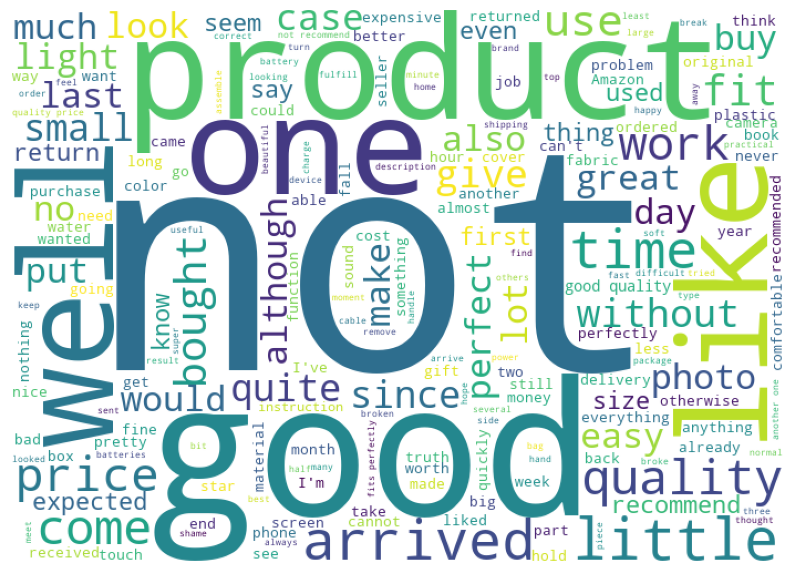

In [52]:
generate_cloud(sample,"translated_review")

# Text Vectorization

In [53]:
!pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ------------------------------- ------ 235.5/282.6 kB 4.8 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 5.8 MB/s eta 0:00:00


In [54]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec
import contractions
from unidecode import unidecode
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [55]:
data = pd.read_csv("translated_review.csv")
data.head()

,Unnamed: 0,review_body,stars,language,translated_review
0,0,La caja del producto llegó un poco dañada. Per...,5,es,The product box arrived a little damaged. But ...
1,1,Inservible y además te puedes cargar la cámara...,1,es,Useless and you can also charge the camera. Wa...
2,2,Muy buen tamaño. Muy práctica. No pesa y tiene...,5,es,Very good size. Very practical. It is not heav...
3,3,Me ha llegado toda sucia y rayada. Se ve que m...,1,es,It arrived to me all dirty and scratched. It s...
4,4,Los pintauñas se caen a la mínima. No duran ni...,1,es,The nail polishes fall off at the slightest. T...


In [56]:
data = data[['translated_review','stars']]
data

,translated_review,stars
0,The product box arrived a little damaged. But ...,5
1,Useless and you can also charge the camera. Wa...,1
2,Very good size. Very practical. It is not heav...,5
3,It arrived to me all dirty and scratched. It s...,1
4,The nail polishes fall off at the slightest. T...,1
...,...,...
995,"Long cable, noise as necessary and very effect...",5
996,"The hoop is too small, as is the backboard, wh...",3
997,They are very small and break easily. I used t...,2
998,It's all about getting used to,4


### Preprocessing

In [57]:
# remove newlines 
def remove_lines(data):
    clean_text =  data.replace("\n",' ').replace("\\n",' ').replace("\t",' ')
    return clean_text

# contraction mapping 
def expand_text(data):
    expanded_doc = contractions.fix(data)
    return expanded_doc

# handle accented character

def accented_char(data):
    fixed_text = unidecode(data)
    return fixed_text

# clean data \
stopword_list = stopwords.words("english")
stopword_list.remove("not")
stopword_list.remove("no")
stopword_list.remove("nor")
def clean_data(data):
    tokens = word_tokenize(data)
    normalization = [word.lower() for word in tokens]
    remove_punct = [word for word in normalization if word not in punctuation]
    words_without_stop = [word for word in  remove_punct if word not in stopword_list]
    clean_text = [word for word in words_without_stop if (len(word)>2) and(word.isalpha())] ## to remove numbers
    return clean_text

# lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_text.append(lemmatized_word)
    return final_text

In [58]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prach\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prach\AppData\Roaming\nltk_data...


True

In [59]:
clean_text = data.translated_review.apply(remove_lines)

clean_text = clean_text.apply(expand_text)

clean_text = clean_text.apply(accented_char)

clean_text = clean_text.apply(clean_data)

clean_text = clean_text.apply(lemmatization)


In [60]:
clean_text

0      [product, box, arrived, little, damaged, inter...
1         [useless, also, charge, camera, water, enters]
2      [good, size, practical, not, heavy, enough, ca...
3      [arrived, dirty, scratched, seems, foisted, us...
4      [nail, polish, fall, slightest, not, last, eve...
                             ...                        
995    [long, cable, noise, necessary, effective, sma...
996    [hoop, small, backboard, also, unstable, salar...
997    [small, break, easily, used, add, petal, weddi...
998                                      [getting, used]
999    [not, bring, shame, sent, email, amazon, see, ...
Name: translated_review, Length: 1000, dtype: object

### Customer Preferences and Needs

In [61]:
## We can find common words to see customer preferences

from collections import Counter

# Concatenate all the words in the clean_text list into a single list
all_words = [word for review in clean_text for word in review]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Get the most common words and their counts
common_words = word_counts.most_common(10)

# Print the common words
for word, count in common_words:
    print(f'{word}: {count}')

not: 782
good: 272
one: 153
quality: 151
product: 149
well: 141
like: 114
time: 114
little: 109
price: 102


In [62]:
    
def join_list(data):
    return " ".join(data)

## count vectorizer dont want tokens it wants string

clean_text = clean_text.apply(join_list)


In [63]:
clean_text

0      product box arrived little damaged interesting...
1                useless also charge camera water enters
2          good size practical not heavy enough capacity
3      arrived dirty scratched seems foisted used ret...
4      nail polish fall slightest not last even day s...
                             ...                        
995    long cable noise necessary effective small com...
996    hoop small backboard also unstable salary supp...
997      small break easily used add petal wedding broke
998                                         getting used
999     not bring shame sent email amazon see luck upset
Name: translated_review, Length: 1000, dtype: object

# Count vectorizer

In [64]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(clean_text)
feature_names = count_vect.get_feature_names_out()  # Access feature names from the vocabulary_
df = pd.DataFrame(bow.A, columns=feature_names)


In [65]:
bow.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
tfidf_vect = TfidfVectorizer()
tfidf_val = tfidf_vect.fit_transform(clean_text)
pd.DataFrame(tfidf_val.A,columns=tfidf_vect.get_feature_names_out())

,aberration,able,absolute,absolutely,absorbent,absorbs,absurd,accelerates,accept,acceptable,...,year,yellow,yellowish,yes,yesterday,yet,yogurt,zero,zipper,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
sent = clean_text.tolist()
final_text = [sen.split() for sen in sent] #[[],[]]
final_text

[['product',
  'box',
  'arrived',
  'little',
  'damaged',
  'interesting',
  'product',
  'applied',
  'daughter',
  'two',
  'hour',
  'liquid',
  'head',
  'plastic',
  'wrap',
  'washing',
  'removed',
  'dead',
  'bug',
  'not',
  'single',
  'nit',
  'left',
  'passing',
  'nit',
  'trap',
  'happy',
  'product'],
 ['useless', 'also', 'charge', 'camera', 'water', 'enters'],
 ['good', 'size', 'practical', 'not', 'heavy', 'enough', 'capacity'],
 ['arrived',
  'dirty',
  'scratched',
  'seems',
  'foisted',
  'used',
  'returned',
  'chair',
  'shame',
  'least',
  'could',
  'cleaned',
  'hide'],
 ['nail',
  'polish',
  'fall',
  'slightest',
  'not',
  'last',
  'even',
  'day',
  'supposed',
  'dry',
  'professional',
  'lamp'],
 ['break', 'quickly', 'drop', 'phone', 'ground', 'come', 'case'],
 ['headphone', 'not', 'fit', 'ear'],
 ['not',
  'like',
  'another',
  'one',
  'buy',
  'economical',
  'not',
  'another',
  'one',
  'buy',
  'company',
  'expensive'],
 ['cover', 'usb'

In [68]:
word_2_vec_model = Word2Vec(final_text,min_count=2,window=3) 
## min_count=2,means the the sentence have 2 or less than 2 words then it will not make vector
# [w1,w2]

- The wv attribute gives access to the word vectors within the model,and you can access the vector representation of a specific word by indexing it using the word itself, such as 'ago'.

In [69]:
word_2_vec_model.wv['purchase']


array([-0.01946046,  0.03118469,  0.00539864, -0.00686113, -0.00763548,
       -0.05925142,  0.02048536,  0.07495805, -0.01539581, -0.02565859,
       -0.01370381, -0.04499485, -0.01365224,  0.00855102,  0.01268367,
       -0.03057439,  0.00398624, -0.03554223, -0.00558649, -0.06129951,
        0.01319315,  0.01917909,  0.01061058, -0.02022109,  0.00165589,
       -0.0051354 , -0.02832288, -0.02947167, -0.0382105 ,  0.00531879,
        0.03018706, -0.002169  ,  0.03484897, -0.02981995, -0.012601  ,
        0.04206754, -0.005651  , -0.02253115, -0.01560412, -0.05590054,
        0.0054496 , -0.02077406, -0.02029428, -0.0059358 ,  0.03024364,
       -0.0180041 , -0.03302738,  0.00794249,  0.03173876,  0.02896635,
        0.01054369, -0.02327222, -0.0162131 , -0.00490357, -0.01510297,
        0.01524844,  0.0292569 , -0.01189088, -0.04068094,  0.02980726,
        0.00191961,  0.02333906, -0.01187283, -0.01076371, -0.04048917,
        0.0183939 ,  0.00231835,  0.03058798, -0.02880979,  0.04

In [70]:
def vectorizer(list_of_docs,model):
    feature = []# to save vector representation of a doc 
    for rew in list_of_docs: # iterating over doc in rew
        zero_vector = np.zeros(model.vector_size)## we get size of vector
        vectors = []# to save vector of each word
        for word in rew:# iterating over words in each rew
            if word in model.wv: # check word availability in model
                try:
                    vectors.append(model.wv[word]) # appended vector of each word
                except KeyError:
                    continue
        if vectors:
            ##till we have got seperate array for each vecor so we have to make them in one array(1d)
            vectors = np.asarray(vectors)# converted into a single array 
            avg_vec = vectors.mean(axis=0) ##axis=0 means x ki value x me add and y ki value y me add ho jsy is liye
            feature.append(avg_vec)
        else :
            feature.append(zero_vector)
    return feature

In [71]:

vectorized_docs = vectorizer(final_text,word_2_vec_model)
vectorized_docs[0]  ## vector representation of single review

array([-0.0213266 ,  0.03009366,  0.00886394,  0.00193296, -0.00328352,
       -0.07463325,  0.01697507,  0.08147454, -0.02675039, -0.01773718,
       -0.01646158, -0.05682836, -0.01134158,  0.01329532,  0.00698844,
       -0.02419076,  0.00096765, -0.04439949, -0.0087613 , -0.07502957,
        0.02346416,  0.0175016 ,  0.01553737, -0.01686635, -0.00972317,
        0.00271162, -0.02372644, -0.02637128, -0.0328694 ,  0.00916591,
        0.04584109,  0.00258056,  0.0337823 , -0.03206486, -0.00657939,
        0.05159433, -0.0007335 , -0.0355751 , -0.02256042, -0.06511501,
       -0.00477249, -0.0338571 , -0.02169701,  0.00314081,  0.02937236,
       -0.02651803, -0.03323515,  0.00075556,  0.02372974,  0.02726492,
        0.01817827, -0.02353259, -0.00851666, -0.01490969, -0.01023648,
        0.01123612,  0.02316907, -0.01423504, -0.04517503,  0.02440575,
        0.00715212,  0.01431302, -0.01723282, -0.01825419, -0.04406497,
        0.02294522,  0.00975605,  0.04593928, -0.03996724,  0.06

In [72]:
final_text[0] # all this words vector representatio n is above

['product',
 'box',
 'arrived',
 'little',
 'damaged',
 'interesting',
 'product',
 'applied',
 'daughter',
 'two',
 'hour',
 'liquid',
 'head',
 'plastic',
 'wrap',
 'washing',
 'removed',
 'dead',
 'bug',
 'not',
 'single',
 'nit',
 'left',
 'passing',
 'nit',
 'trap',
 'happy',
 'product']

In [73]:
vectorized_docs

[array([-0.0213266 ,  0.03009366,  0.00886394,  0.00193296, -0.00328352,
        -0.07463325,  0.01697507,  0.08147454, -0.02675039, -0.01773718,
        -0.01646158, -0.05682836, -0.01134158,  0.01329532,  0.00698844,
        -0.02419076,  0.00096765, -0.04439949, -0.0087613 , -0.07502957,
         0.02346416,  0.0175016 ,  0.01553737, -0.01686635, -0.00972317,
         0.00271162, -0.02372644, -0.02637128, -0.0328694 ,  0.00916591,
         0.04584109,  0.00258056,  0.0337823 , -0.03206486, -0.00657939,
         0.05159433, -0.0007335 , -0.0355751 , -0.02256042, -0.06511501,
        -0.00477249, -0.0338571 , -0.02169701,  0.00314081,  0.02937236,
        -0.02651803, -0.03323515,  0.00075556,  0.02372974,  0.02726492,
         0.01817827, -0.02353259, -0.00851666, -0.01490969, -0.01023648,
         0.01123612,  0.02316907, -0.01423504, -0.04517503,  0.02440575,
         0.00715212,  0.01431302, -0.01723282, -0.01825419, -0.04406497,
         0.02294522,  0.00975605,  0.04593928, -0.0

In [74]:
x_emb = np.array(vectorized_docs)

In [75]:
x_emb

array([[-0.0213266 ,  0.03009366,  0.00886394, ..., -0.04751207,
         0.00588608, -0.01560828],
       [-0.0164638 ,  0.02308833,  0.00424448, ..., -0.03971815,
         0.00666771, -0.01364401],
       [-0.02878219,  0.04240674,  0.01551799, ..., -0.07206428,
         0.0052096 , -0.02271475],
       ...,
       [-0.01163449,  0.0257952 ,  0.00514178, ..., -0.03882166,
        -0.00032811, -0.01202989],
       [-0.01400629,  0.02480655,  0.01045328, ..., -0.04902349,
        -0.00397527, -0.0182653 ],
       [-0.02209035,  0.03559757,  0.00938139, ..., -0.0586001 ,
         0.00627023, -0.01314222]])

In [76]:
# kmeans 
def build_kmeans(clusters,data):
    kmeans_model = KMeans(n_clusters=clusters)
    y_pred = kmeans_model.fit_predict(data)
    return kmeans_model,y_pred

In [77]:
# kmeans-count 
kmeans_count,count_pred = build_kmeans(3,bow.A)

C:\Users\prach\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prach\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [78]:
kmeans_count

KMeans(n_clusters=3)

In [79]:
count_pred

array([1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1,
       2, 2, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2,
       0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1,
       2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0, 0,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0,
       2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2,
       1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 0,

In [80]:
# kmeans-tfidf 
kmeans_tfidf,tfidf_pred = build_kmeans(3,tfidf_val.A)

C:\Users\prach\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prach\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [81]:
tfidf_pred

array([0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 2,
       1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0,
       1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1, 2,
       2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0,

In [82]:
# kmeans-word2vec
kmeans_word2vec,word2vec_pred = build_kmeans(3,x_emb)

C:\Users\prach\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prach\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [83]:
print(f"Silhouette score with KMeans-Count {silhouette_score(bow.A,count_pred)}")
print(f"Silhouette score with KMeans-Tfidf {silhouette_score(tfidf_val.A,tfidf_pred)}")
print(f"Silhouette score with KMeans-Word2vec {silhouette_score(x_emb,word2vec_pred)}")

Silhouette score with KMeans-Count 0.028445400957305567
Silhouette score with KMeans-Tfidf 0.005560258894120044
Silhouette score with KMeans-Word2vec 0.46434692065027444


- Silhouette score with KMeans-Count: 0.1846354169188717
  This score suggests a moderate level of clustering quality. It indicates that the clustering algorithm based on the CountVectorizer   representation achieved some degree of separation between clusters, but there is room for improvement.

- Silhouette score with KMeans-Tfidf: 0.005400049213137686
  This score is very low, close to 0. It suggests poor clustering quality, indicating that the clusters based on the Tf-idf (Term       Frequency-Inverse Document Frequency) representation are overlapping or poorly separated.

- Silhouette score with KMeans-Word2vec: 0.45982312733514225
  This score is relatively high, close to 0.5, indicating good clustering quality. The clusters based on the Word2Vec representation     show a reasonable level of separation and similarity within each cluster.

In [84]:
# visualizer

def visualize_silhouette(data,model):
    visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(data)
    

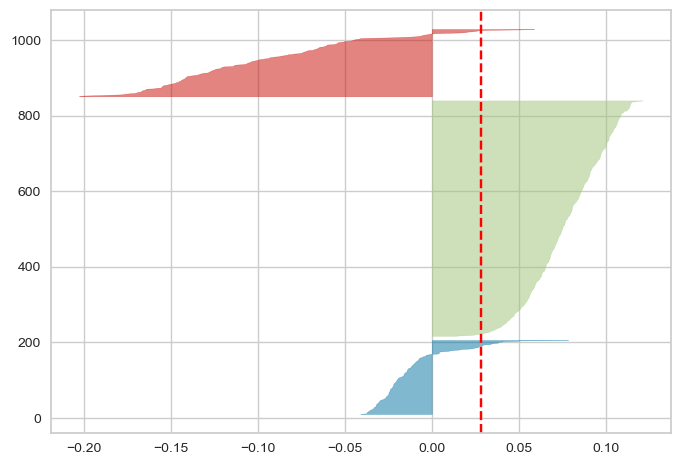

In [85]:
# kmeans-count
visualize_silhouette(bow.A,kmeans_count)

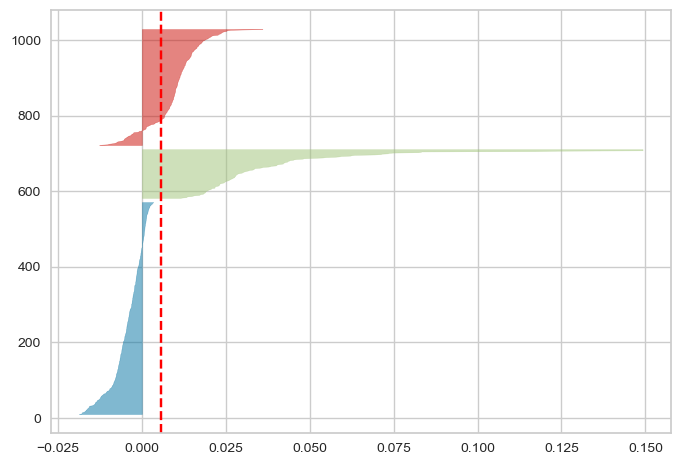

In [86]:
# kmeans-tfidf
visualize_silhouette(tfidf_val.A,kmeans_tfidf)

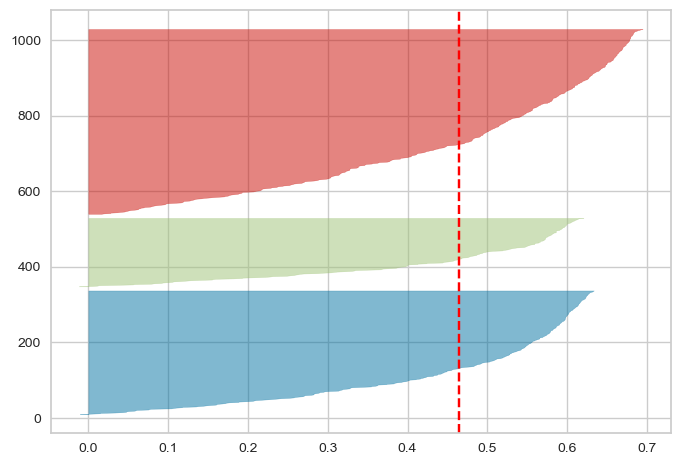

In [87]:
# kmeans-word2vec
visualize_silhouette(x_emb,kmeans_word2vec)